<a href="https://colab.research.google.com/github/Zpoint777/EDA_case_study_Group3_DataBootcamp_ECON-UB_232/blob/main/EDA_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### EDA Case Study

**Introduction**

This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

**Business Understanding**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose we work for a consumer finance company which specializes in lending various types of loans to urban customers. We will have to use EDA to analyze the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer: Loan has been cancelled by the client but on different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

**Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

**Data Understanding**

This dataset has 3 files as explained below:

`application_data.csv` contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

`previous_application.csv` contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

`columns_description.xlsx` is data dictionary which describes the meaning of the variables.


I have given a link to the data files in a drive folder [here](https://drive.google.com/drive/folders/1YpPjU4Y12MPrMdWaNDa6rS2MNirh2FG3?usp=sharing).  I suggest unzipping them and putting them in your google drive, and link to them directly using colab and its "mount drive" functionality.

In [1]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
app_data = pd.read_csv("/content/application_data.csv.zip")

In [6]:
columns_data = pd.read_excel("/content/columns_description.xlsx")

In [7]:
prev_app = pd.read_csv("/content/previous_application.csv.zip")

In [8]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
columns_data.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [11]:
app_data.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [12]:
app_data["REG_CITY_NOT_WORK_CITY"]


,REG_CITY_NOT_WORK_CITY
0,0
1,0
2,0
3,0
4,1
...,...
307506,0
307507,0
307508,1
307509,1


In [13]:
app_data["AMT_INCOME_TOTAL"]

,AMT_INCOME_TOTAL
0,202500.0
1,270000.0
2,67500.0
3,135000.0
4,121500.0
...,...
307506,157500.0
307507,72000.0
307508,153000.0
307509,171000.0


In [14]:
app_data["LOAN_INCOME_RATIO"] = app_data["AMT_CREDIT"] / app_data["AMT_INCOME_TOTAL"]


In [15]:
import seaborn as sns

In [16]:
app_data["TARGET"].value_counts()

,count
TARGET,
0,282686
1,24825


In [17]:
counts = app_data["TARGET"].value_counts()

ratio = counts[1] / counts[0]

print(ratio)

0.08781828601345662


In [18]:
app_data.groupby("REG_CITY_NOT_WORK_CITY")["TARGET"].mean()

,TARGET
REG_CITY_NOT_WORK_CITY,
0,0.073127
1,0.106114


In [29]:
app_data["LOAN_INCOME_RATIO"] = app_data["AMT_CREDIT"] / app_data["AMT_INCOME_TOTAL"]

In [30]:
median_ratio = app_data["LOAN_INCOME_RATIO"].median()

In [31]:
high_group = app_data[app_data["LOAN_INCOME_RATIO"] > median_ratio]
low_group = app_data[app_data["LOAN_INCOME_RATIO"] <= median_ratio]

print("High LIR default rate:", high_group["TARGET"].mean())
print("Low LIR default rate:", low_group["TARGET"].mean())

High LIR default rate: 0.0805424566652574
Low LIR default rate: 0.08091515679669108


In [32]:
app_data["YEARS_EMPLOYED"] = -app_data["DAYS_EMPLOYED"] / 365

In [33]:
median_emp = app_data["YEARS_EMPLOYED"].median()

In [34]:
app_data["LONG_EMPLOYMENT"] = app_data["YEARS_EMPLOYED"] > median_emp

In [35]:
app_data.groupby("LONG_EMPLOYMENT")["TARGET"].mean()

,TARGET
LONG_EMPLOYMENT,
False,0.089720
True,0.071738


In [36]:
app_data.groupby("NAME_INCOME_TYPE")["TARGET"].mean().sort_values(ascending=False)

,TARGET
NAME_INCOME_TYPE,
Maternity leave,0.400000
Unemployed,0.363636
Working,0.095885
Commercial associate,0.074843
State servant,0.057550
Pensioner,0.053864
Businessman,0.000000
Student,0.000000


In [37]:
app_data["NAME_INCOME_TYPE"].value_counts()

,count
NAME_INCOME_TYPE,
Working,158774
Commercial associate,71617
Pensioner,55362
State servant,21703
Unemployed,22
Student,18
Businessman,10
Maternity leave,5


In [40]:
grouped = app_data.groupby("NAME_EDUCATION_TYPE")
education_stats = grouped["TARGET"].agg(["count", "mean"])
education_stats = education_stats.sort_values("mean", ascending=False)
education_stats

,count,mean
NAME_EDUCATION_TYPE,,
Lower secondary,3816,0.109277
Secondary / secondary special,218391,0.089399
Incomplete higher,10277,0.084850
Higher education,74863,0.053551
Academic degree,164,0.018293


<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='TARGET'>

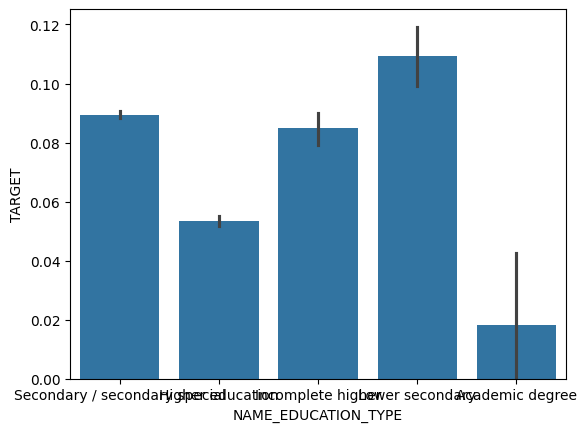

In [41]:
sns.barplot(data=app_data, x="NAME_EDUCATION_TYPE", y="TARGET")

<Axes: xlabel='LONG_EMPLOYMENT', ylabel='TARGET'>

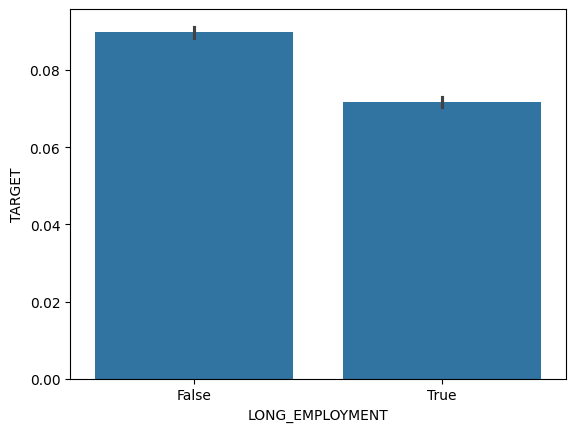

In [42]:
sns.barplot(data=app_data, x="LONG_EMPLOYMENT", y="TARGET")

<Axes: xlabel='REG_CITY_NOT_WORK_CITY', ylabel='TARGET'>

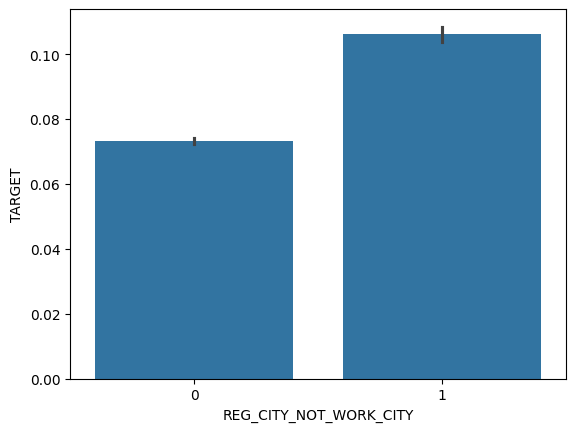

In [43]:
sns.barplot(data=app_data, x="REG_CITY_NOT_WORK_CITY", y="TARGET")

<Axes: xlabel='HIGH_LIR', ylabel='TARGET'>

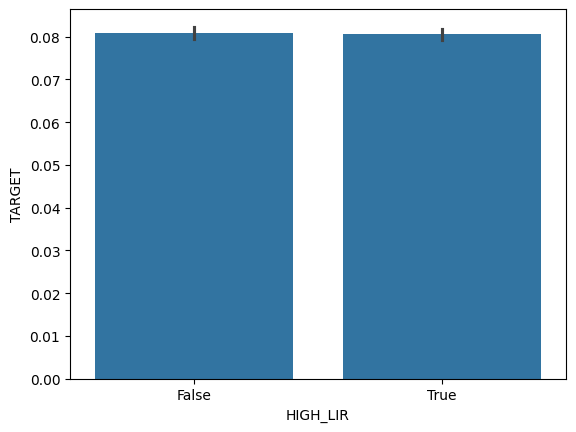

In [44]:
sns.barplot(data=app_data, x="HIGH_LIR", y="TARGET")